In [172]:
import json
import corner
import numpy as np
import matplotlib.pyplot as plt

In [173]:
samples_dict = json.load(open('../../data/interim/model_parameters/COVID19_SEIRD/calibrations/national/BE_WAVE1_BETA_COMPLIANCE_2021-01-21.json'))

In [174]:
keys = ['l', 'tau', 'prev_work', 'prev_rest', 'prev_home']
labels = ['l','$\\tau$', 'prev_work', 'prev_rest', 'prev_home']

In [179]:
def samples_dict_to_emcee_chain(samples_dict,keys,discard=0,thin=1):
    # Convert to raw flat samples
    flat_samples_raw = np.zeros([len(samples_dict[keys[0]]),len(keys)])
    for idx,key in enumerate(keys):
        flat_samples_raw[:,idx] = samples_dict[key]
    # Convert to raw samples
    samples_raw = np.zeros([int(flat_samples_raw.shape[0]/n_chains),n_chains,flat_samples_raw.shape[1]])
    for i in range(flat_samples_raw.shape[1]):
        split_chains = np.split(flat_samples_raw[:,i], n_chains)
        for j,chain in enumerate(split_chains):
            samples_raw[:,j,i] = split_chains[j]
    # Do discard
    samples_discard = np.zeros([(samples_raw.shape[0]-discard),n_chains,flat_samples_raw.shape[1]])
    for i in range(samples_raw.shape[1]):
        for j in range(flat_samples_raw.shape[1]):
            samples_discard[:,i,j] = samples_raw[discard:,i,j]  
    # Do thin
    samples = samples_discard[::thin,:,:]
    # Convert to flat samples
    flat_samples = samples[:,0,:]
    for i in range(1,samples.shape[1]):
        flat_samples=np.append(flat_samples,samples[:,i,:],axis=0)
    return samples,flat_samples

In [185]:
samples,flat_samples=samples_dict_to_emcee_chain(samples_dict,keys,discard=200,thin=10)

In [186]:
flat_samples.shape

(350, 5)

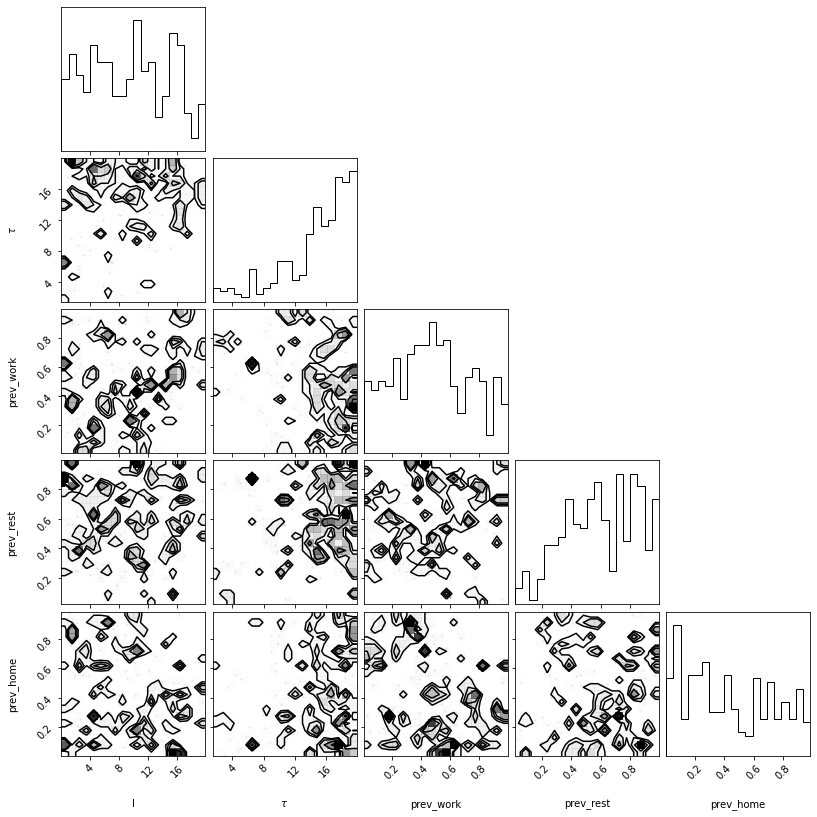

In [187]:
fig = corner.corner(flat_samples,labels=labels)